#**Creating and using functions**

 Functions reduce repetition
 Functions make code testable
 Functions are mandatory for:
 - Pandas pipelines
 - ML feature engineering
 - Production code



In [ ]:
def greet():
    print("Hello Data Analyst")

greet()


Hello Data Analyst


In [ ]:
def greet_user(name):
    print("Hello", name)

greet_user("Ak")


Hello Ak


In [ ]:
def add(a, b):
    return a + b

result = add(5, 3)
print(result)


8


Rule
print → shows output,


return → gives value to program

Data analysis always needs return

In [ ]:
def stats(numbers):
    total = sum(numbers)
    count = len(numbers)
    avg = total / count
    return total, avg

t, a = stats([10, 20, 30])
print(t, a)


60 20.0


In [ ]:
def filter_even(number_list):
  return_list=[]
  for number in number_list:
    if number%2==0:
      return_list.append(number)
  return return_list

In [ ]:
even_list = filter_even([1,2,3,34,4,3,2,4,4,3])


In [ ]:
even_list

[2, 34, 4, 2, 4, 4]

In [ ]:
def power(base, exp=2):
    return base ** exp

power(5)
power(5, 3)


125

In [ ]:
def student(name, age):
    return name, age

student(age=20, name="Ak")


('Ak', 20)

In [ ]:
emx = 10  # global

def demo():
    x = 5  # local
    print(x)

demo()
print(x)


5
10


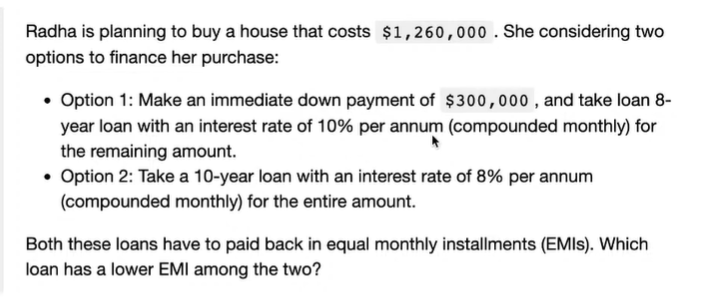  

In [ ]:
def loan_emi(amount):
  emi=amount/12
  print('The EMI is ${} per month'.format(emi))

In [ ]:
loan_emi(1260000)

The EMI is $105000.0 per month


In [ ]:
def loan_emi(amount,duration):
  emi=amount/duration
  print(f'The EMI is ${emi} per month')

we can now comapare a 8-year loan vs a 10-year loan (assuming no down payment or interest)


In [ ]:
loan_emi(1260000,8*12)
loan_emi(1260000,10*12)


The EMI is $13125.0 per month
The EMI is $10500.0 per month


#RETURN VALUE
as u might expected ,the emi of the 8 year is higher compared to 10 year loan.
right now we are printing out the result ,but it would be better to return it and store the results in variable for eaiser comparision ,we can do this using the return statement.


In [ ]:
def loan_emi(amount,  duration):
  emi=amount/duration
  return emi

In [ ]:
emi1=loan_emi(1260000,8*12)
emi2=loan_emi(1260000,10*12)

In [ ]:
emi1


13125.0

In [ ]:
emi2

10500.0

#optimal argument
lets now add another argument to account for the immediate down paymwnt .we will make this an optimal argument with a default value of 0.

In [ ]:
def loan_emi(amount,  duration,down_pay=0):
  loan_amount=amount-down_pay
  emi=loan_amount/duration
  return emi

In [ ]:
emi1=loan_emi(1260000,8*12,3e5)
emi1

10000.0

In [ ]:
emi2=loan_emi(1260000,10*12)
emi2

10500.0

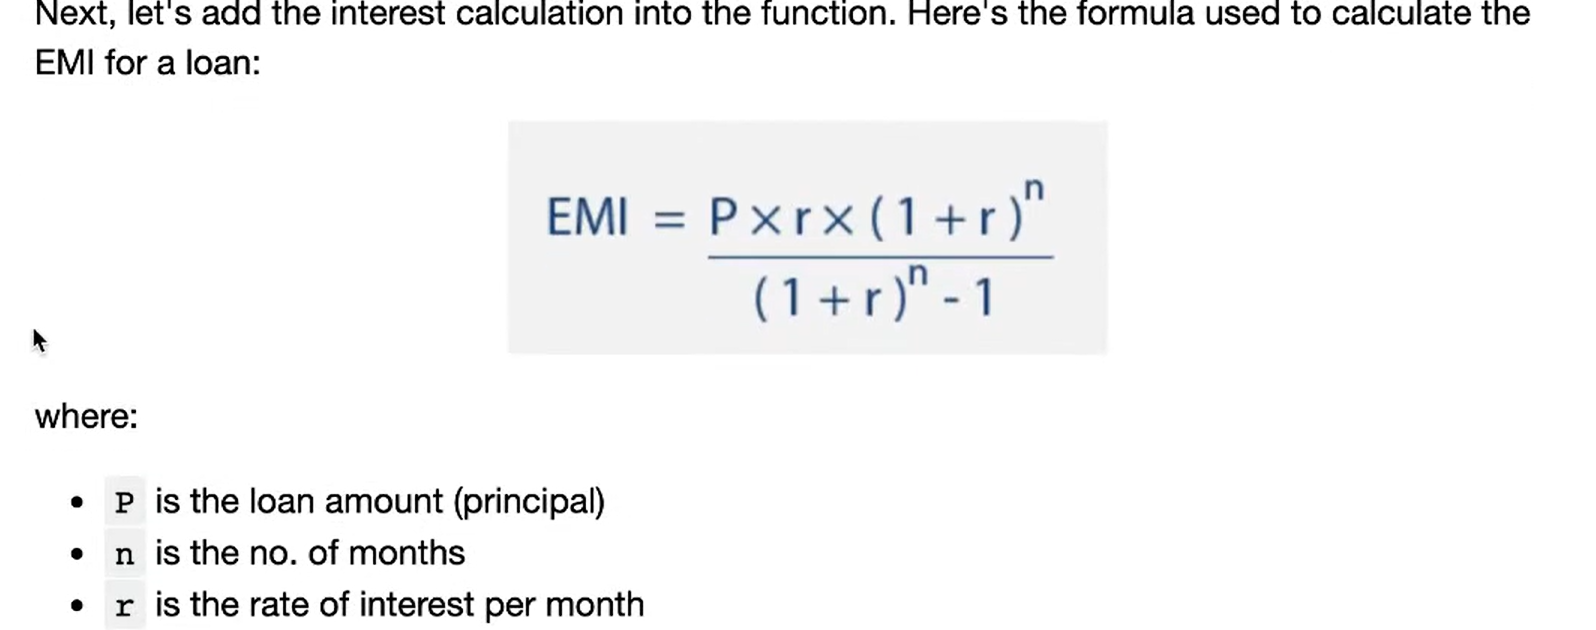

In [ ]:
def loan_emi(amount,duration,rate,down_pay=0):
  loan_amount = amount - down_pay
  emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
  return emi

In [ ]:
loan_emi(1260000,8*12,0.1/12,3e5)

14567.19753389219

In [ ]:
loan_emi(1260000,10*12,0.08/12)

15287.276888775077

#Named argument
In Python, named arguments (also called keyword arguments) are a way of passing values to a function by explicitly mentioning the parameter name in the function call, in the format name=value


In [ ]:
emi1=loan_emi(amount=1260000,duration=8*12,rate=0.1/12,down_pay=3e5)


In [ ]:
emi1

14567.19753389219

In [ ]:
emi2=loan_emi(amount=1260000,duration=10*12,rate=0.08/12)
emi2

15287.276888775077

#Modulas and library function
In Python, modules are single files containing functions, classes, and variables that organize code, while libraries are broader collections of related modules and packages that provide reusable functionality for various tasks. Functions are blocks of code within modules that perform a specific task.



In [ ]:
#FOR rounding up our EMI amounts ,we can use the ceil function (short for ceiling ) from the math module .lets import and the module and use it to round up the number 1.2.


import math

In [ ]:
help(math.ceil)

Help on built-in function ceil in module math:

ceil(x, /)
    Return the ceiling of x as an Integral.

    This is the smallest integer >= x.



In [ ]:
math.ceil(1.2)

2

Let's now use the math.ceil function within the home_loan_emi function to round up the emi amount

In [ ]:
def loan_emi(amount,duration,rate,down_pay=0):
  loan_amount = amount - down_pay
  emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
  emi=math.ceil(emi)
  return emi

In [ ]:
emi1=loan_emi(amount=1260000,duration=8*12,rate=0.1/12,down_pay=3e5)


In [ ]:
emi1

14568

In [ ]:
emi2=loan_emi(amount=1260000,duration=10*12,rate=0.08/12)
emi2

15288

LEts compare bthe emi and display a message for the option with the lower emi

In [ ]:
if emi1<emi2:
  print ("option  1 has the lower emi:${}".format(emi1))
else:
  print ("option  2 has the lower emi:${}".format(emi2))

option  1 has the lower emi:$14568


#Reusing and improving function

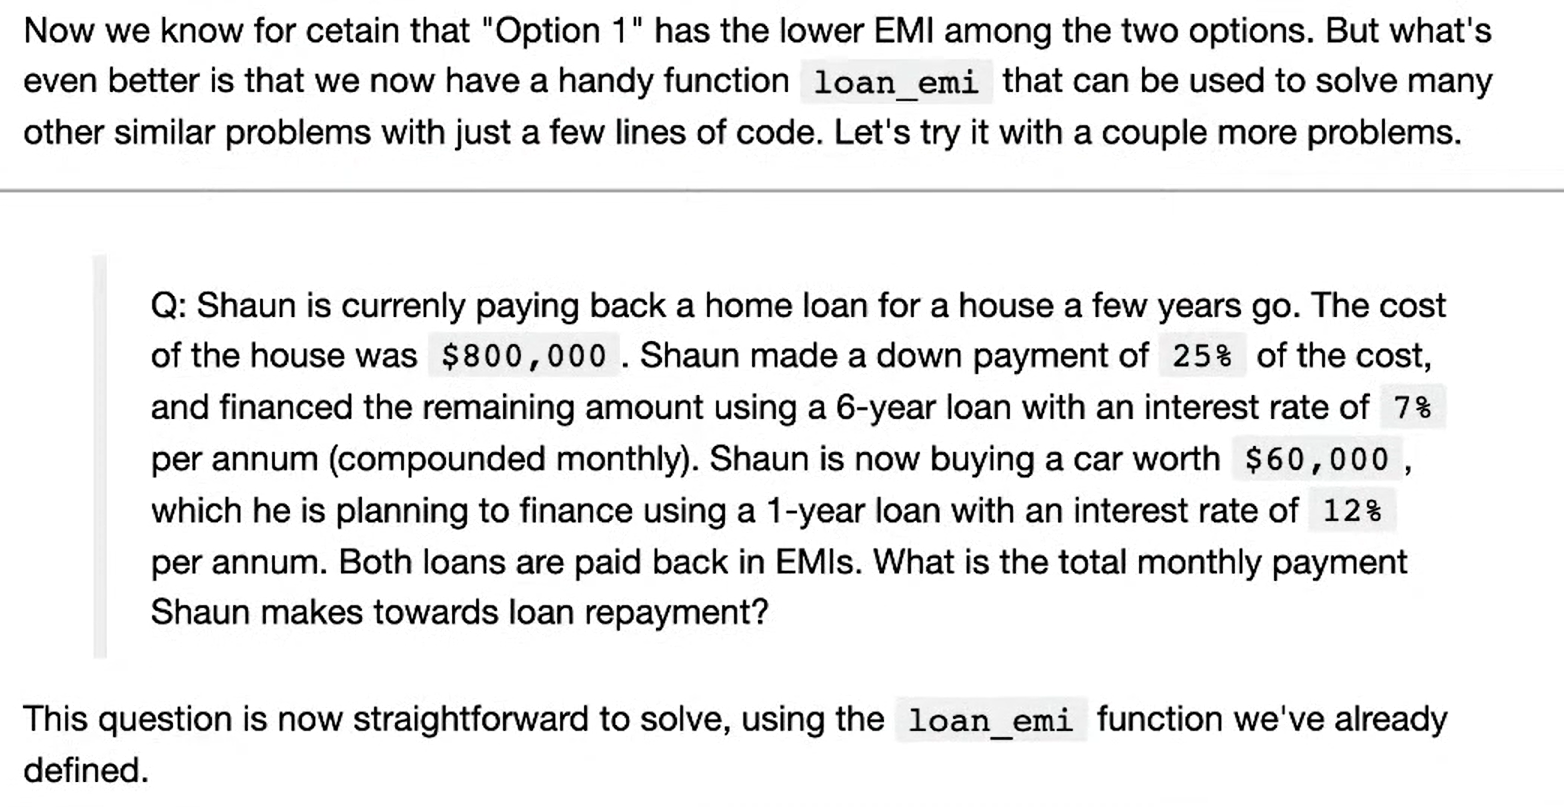

In [ ]:
cost_of_house=800000
home_loan_duration=6*12
home_loan_rate=0.07/12
home_down_pay=.25*800000
emi_house=loan_emi(amount=cost_of_house,
                   duration=home_loan_duration,
                   rate=home_loan_rate,
                   down_pay=home_down_payment)

emi_house


10230

In [ ]:
cost_of_car=60000
car_loan_duration=1*12
car_loan_rate=0.12/12
emi_car=loan_emi(amount=cost_of_car,
                   duration=car_loan_duration,
                   rate=car_loan_rate,)
emi_car


5331

In [ ]:
print(f"Shaun makes a total monthly payment of ${emi_house+emi_car} toward loan repayment. ")

Shaun makes a total monthly payment of $15561 toward loan repayment. 


#Exception and try -except
In Python, try and except are keywords used together in a try...except block to handle runtime errors, known as exceptions, preventing the program from crashing abruptly.
he try...except Block
The try...except block is Python's mechanism for catching and handling exceptions that might occur during the execution of a program.
#The try block:
 This block contains the code that you anticipate might raise an exception.
except block: If an exception occurs within the try block, the rest of the try block is skipped, and execution transfers to the except block. This block defines how to respond to the error.





#syntax
try:
     #Code that might raise an exception

    result = 10 / 0
except:
     #Code to handle the exception

    print("An exception occurred")


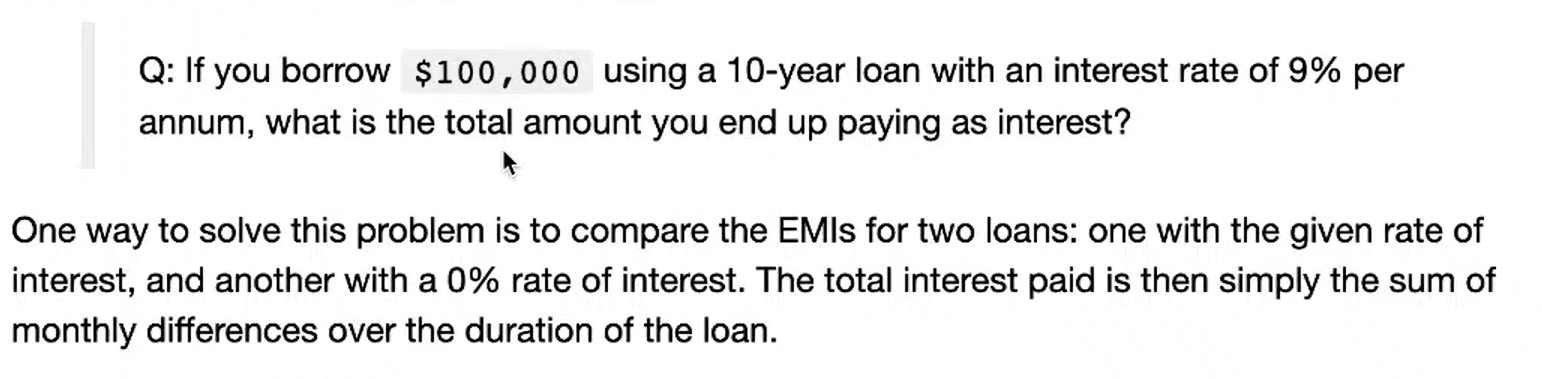

In [ ]:
emi_with_interest=loan_emi(amount=100000,
                   duration=10*12,
                   rate=0.09/12)
emi_with_interest

1267

In [ ]:
#emi_without_interest=loan_emi(amount=100000,
                  # duration=10*12,
                  # rate=0./12)
#emi_without_interest
#its comes zero divisionError
#to solve this exception use try-except

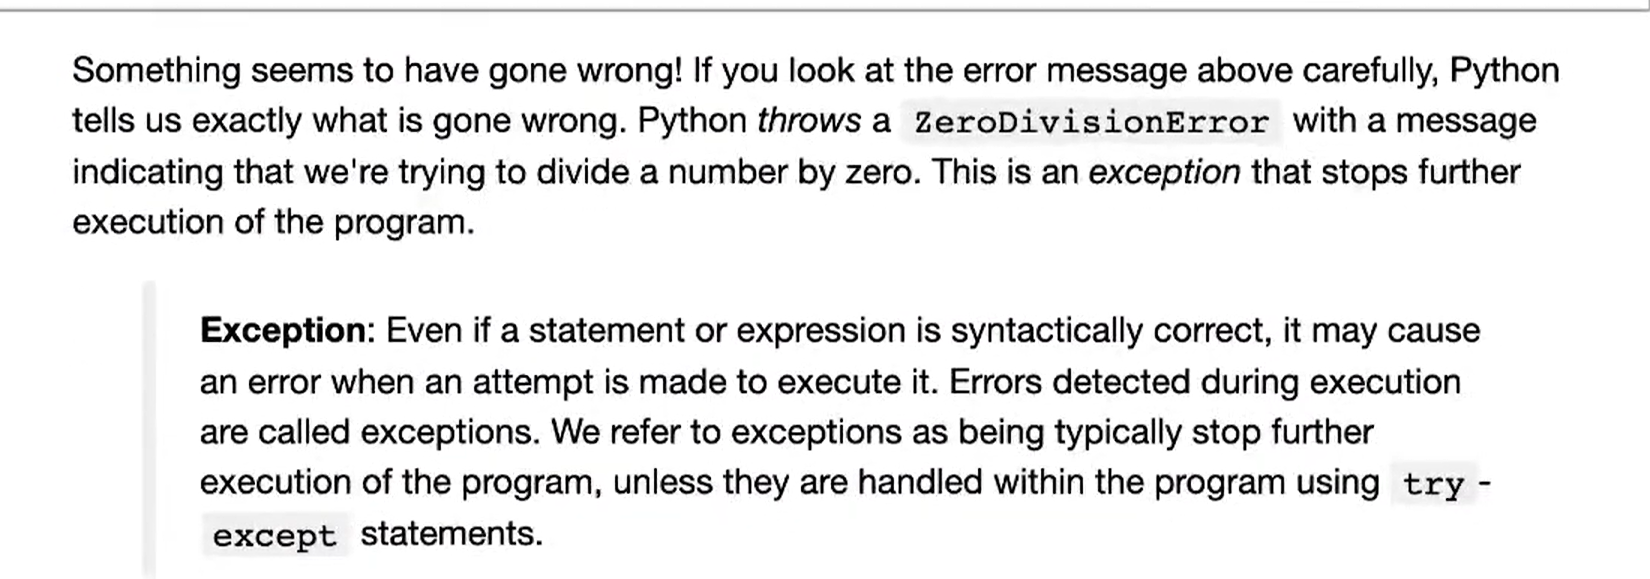

In [ ]:
try:
  print("Now computing the result ")
  result=5/0
  print("Computation was completed successfully")
except ZeroDivisionError:
  print("Failed to compute result because you were trying to divide by zero")

  result=-99

print(result)

Now computing the result 
Failed to compute result because you were trying to divide by zero
-99


In [ ]:
try:
  print("Now computing the result ")
  result=5/2
  print("Computation was completed successfully")
except ZeroDivisionError:
  print("Failed to compute result because you were trying to divide by zero")

  result=-99

print(result)

Now computing the result 
Computation was completed successfully
2.5


In [ ]:
def loan_emi(amount,duration,rate,down_pay=0):
  loan_amount = amount - down_pay
  try:
    emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
  except ZeroDivisionError:
    emi = loan_amount / duration
  emi=math.ceil(emi)
  return emi

In [ ]:
emi_with_interest=loan_emi(amount=100000,
                   duration=10*12,
                   rate=0.09/12)
emi_with_interest

1267

In [ ]:
emi_without_interest=loan_emi(amount=100000,
                   duration=10*12,
                   rate=0./12)
emi_without_interest


834

In [ ]:
total_interest=emi_with_interest-emi_without_interest
total_interest

433

In [ ]:
print(f"The total interest paid is ${total_interest}.")

The total interest paid is $433.


#DOUCUMENTING FUNCTION USING DOCSTINGS

We can add some documentation within our functiono using docstring .A docstring is a simply a string that appear as the first statement within the function body,and is used by the help function.a good docsstring whta the function does and provides some expplenation about the argument.

In [ ]:
def loan_emi(amount,duration,rate,down_pay=0):
  """Calulates the eqaul monthly installment(emi)for a loan.

  Arguments:
    amount-total amount to be spent (loan + down payment)
    duration-duration of the loan (in months)
    rate-rate of interest (monthly)
    down_pay-intial payment required to start the loan (optional)

  """
  loan_amount = amount - down_pay
  try:
    emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
  except ZeroDivisionError:
    emi = loan_amount / duration
  emi=math.ceil(emi)
  return emi

in the docstring above, we've provided some additional information that the duration and rate are both measured in months. You might even consider naming the arguments duration_months and rate_monthly, to avoid any confusion whatsoever. Can you think of some other ways in which the function can be improved?

In [ ]:
help(loan_emi)

Help on function loan_emi in module __main__:

loan_emi(amount, duration, rate, down_pay=0)
    Calulates the eqaul monthly installment(emi)for a loan.

    Arguments:
      amount-total amount to be spent (loan + down payment)
      duration-duration of the loan (in months)
      rate-rate of interest (monthly)
      down_pay-intial payment required to start the loan (optional)



#Exercise - Data Analysis for Vacation Planning


You're planning a leisure trip (vacation) and you need to decide which city you want to visit. You have shortlisted 4 cities, and identified the cost of the return flight, daily hotel cost and a weekly car rental cost (a car has to be rented for full weeks, even if you return the car before a week ends).

City,Return Flight ($),Hotel per day ($),Weekly Car Rental ($)
Paris,200,20,200
London,250,30,120
Dubai,370,15,80
Mumbai,450,10,70



Answer the following questions using the data above:



1.If you're planning a 1-week long trip, which city should you visit to spend the least amount of money?

2.How does the answer to the previous question change if you change the duration of the trip to 4 days, 10 days or 2 weeks?

3.If your total budget for the trip is $1000, which city should you visit to maximize the duration of your trip? Which city should you visit if you want to minimize the duration?


4.How does the answer to the previous question change if your budget is $600, $2000 or $1500?


Hint: To answer these questions, it will help to define a function cost_of_trip with relevant inputs like flight cost, hotel rate, car rental rate and duration of the trip. You may find the math.ceil function useful for calculating the total cost of car rental.

In [ ]:
# City cost data
cities = {
    "Paris":   {"flight": 200, "hotel": 20, "car": 200},
    "London":  {"flight": 250, "hotel": 30, "car": 120},
    "Dubai":   {"flight": 370, "hotel": 15, "car": 80},
    "Mumbai":  {"flight": 450, "hotel": 10, "car": 70}
}


In [ ]:
import math


In [ ]:
def cost_of_trip(flight, hotel_per_day, weekly_car, days):
    weeks = math.ceil(days / 7)
    total_cost = flight + (hotel_per_day * days) + (weekly_car * weeks)
    return total_cost



In [ ]:
#QUES-1=1-Week Trip
days = 7
costs = {}

for city, data in cities.items():
    cost = cost_of_trip(
        data["flight"],
        data["hotel"],
        data["car"],
        days
    )
    costs[city] = cost

costs


{'Paris': 540, 'London': 580, 'Dubai': 555, 'Mumbai': 590}

In [ ]:
#Chepest city for one week
min(costs, key=costs.get), costs[min(costs, key=costs.get)]


('Paris', 540)

In [ ]:
#ques-2=Different duration
durations = [4, 10, 14]

results = {}

for d in durations:
    results[d] = {}
    for city, data in cities.items():
        results[d][city] = cost_of_trip(
            data["flight"],
            data["hotel"],
            data["car"],
            d
        )

results


{4: {'Paris': 480, 'London': 490, 'Dubai': 510, 'Mumbai': 560},
 10: {'Paris': 800, 'London': 790, 'Dubai': 680, 'Mumbai': 690},
 14: {'Paris': 880, 'London': 910, 'Dubai': 740, 'Mumbai': 730}}

In [ ]:
#Cheapest
for d in durations:
    city = min(results[d], key=results[d].get)
    print(d, "days ->", city, results[d][city])


4 days -> Paris 480
10 days -> Dubai 680
14 days -> Mumbai 730


In [ ]:
#ques-3-Budget=1000
budget = 1000
max_days = {}
min_days = {}


In [ ]:
for city, data in cities.items():
    days = 1
    while cost_of_trip(data["flight"], data["hotel"], data["car"], days) <= budget:
        days += 1

    max_days[city] = days - 1
    min_days[city] = 1


In [ ]:
#maximazie
max(max_days, key=max_days.get), max_days


('Mumbai', {'Paris': 14, 'London': 14, 'Dubai': 21, 'Mumbai': 27})

In [ ]:
#minimize
min(max_days, key=max_days.get), max_days


('Paris', {'Paris': 14, 'London': 14, 'Dubai': 21, 'Mumbai': 27})

In [ ]:
#ques-4-Multiple budget
budgets = [600, 1000, 1500, 2000]
summary = {}


In [ ]:
for b in budgets:
    summary[b] = {}
    for city, data in cities.items():
        days = 1
        while cost_of_trip(data["flight"], data["hotel"], data["car"], days) <= b:
            days += 1
        summary[b][city] = days - 1

summary


{600: {'Paris': 7, 'London': 7, 'Dubai': 7, 'Mumbai': 7},
 1000: {'Paris': 14, 'London': 14, 'Dubai': 21, 'Mumbai': 27},
 1500: {'Paris': 25, 'London': 25, 'Dubai': 42, 'Mumbai': 49},
 2000: {'Paris': 35, 'London': 35, 'Dubai': 60, 'Mumbai': 77}}

In [ ]:
#best and worst city per budget
for b in budgets:
    best = max(summary[b], key=summary[b].get)
    worst = min(summary[b], key=summary[b].get)
    print("Budget:", b)
    print("Max stay:", best, summary[b][best], "days")
    print("Min stay:", worst, summary[b][worst], "days")
    print()


Budget: 600
Max stay: Paris 7 days
Min stay: Paris 7 days

Budget: 1000
Max stay: Mumbai 27 days
Min stay: Paris 14 days

Budget: 1500
Max stay: Mumbai 49 days
Min stay: Paris 25 days

Budget: 2000
Max stay: Mumbai 77 days
Min stay: Paris 35 days



#*args – MULTIPLE POSITIONAL ARGUMENTS

What it is
*args collects extra positional inputs into a tuple.

Why it exists
Input count is unknown.

When you use it
• Variable number of values
• Summation, aggregation
• Data pipelines

Real example
• Combine multiple columns
• Merge scores

In [ ]:
def add_numbers(*args):
    # args is a tuple
    total = 0
    for num in args:
        total += num
    return total

add_numbers(1, 2, 3, 4)


10

Key points
• args is a tuple
• Order matters
• Used when input count is unknown

#FUNCTION WITH **kwargs

What it is
**kwargs collects named inputs into a dictionary.

Why it exists
Flexible configuration.

When you use it
• Optional parameters
• Settings, flags
• ML model configs

Real example
• Plot settings
• Model hyperparameters

In [ ]:
# **kwargs collects keyword arguments
def student_info(**kwargs):
    return kwargs

student_info(name="Ak", age=20, course="Data Analysis")


{'name': 'Ak', 'age': 20, 'course': 'Data Analysis'}

Key points
• kwargs is a dictionary
• Key-value pairs
• Used in configuration and pipelines

#*args + **kwargs TOGETHER



In [ ]:
def demo(a, b, *args, **kwargs):
    print(a, b)
    print(args)
    print(kwargs)

demo(1, 2, 3, 4, x=10, y=20)


1 2
(3, 4)
{'x': 10, 'y': 20}


Rule
• args comes before kwargs

#FUNCTION INSIDE FUNCTION

What it is
A function defined inside another function.

Why it exists
Scope control.

When you use it
• Helper logic
• Decorators
• Encapsulation

Real example
• Validation inside processing step

In [ ]:
def outer():
    def inner():
        return "Hello from inner"
    return inner()

outer()


'Hello from inner'

Why important
• Code isolation
• Used in decorators
• Used in ML pipelines

#CLOSURE

What it is
Inner function remembers outer variables.

Why it exists
State preservation.

When you use it
• Custom transformations
• Parameterized functions

Real example
• Scaling features
• Reusable metric calculators

In [ ]:
def multiplier(x):
    def multiply(y):
        return x * y
    return multiply

double = multiplier(2)
double(10)


20

What happened
• x is remembered
• Even after outer function ends

#RECURSION

What it is
Function calling itself.

Why it exists
Solve repetitive problems.

When you use it
• Tree data
• Graph traversal
• Divide problems

Real example
• Folder size calculation
• JSON parsing

In [ ]:
def factorial(n):
    if n == 1:
        return 1
    return n * factorial(n - 1)

factorial(5)


120

Rules
• Base case mandatory
• Stack memory used

#FUNCTION AS ARGUMENT

Passing function into another function.

Why it exists
Behavior control.

When you use it
• Data processing pipelines
• Callbacks

Real example
• apply, map, filter
• Custom metrics

In [ ]:
def square(x):
    return x * x

def apply_function(func, value):
    return func(value)

apply_function(square, 5)


25

Used in
• Data pipelines
• Map reduce
• Callbacks

#FUNCTION RETURNING FUNCTION

What it is
Function creates and returns another function.

Why it exists
Dynamic behavior.

When you use it
• Parameterized logic
• Factory patterns

Real example
• Loss functions
• Feature generators

In [ ]:
def power(n):
    def calc(x):
        return x ** n
    return calc

square = power(2)
square(4)


16

#DECORATOR BESIC

What it is
A function that modifies another function.

Why it exists
Add behavior without changing code.

When you use it
• Logging
• Validation
• Timing

Real example
• ML experiment tracking
• API authentication


In [ ]:
def my_decorator(func):
    def wrapper():
        print("Before function")
        func()
        print("After function")
    return wrapper


In [ ]:
#USE

In [ ]:
@my_decorator
def say_hi():
    print("Hi")

say_hi()


Before function
Hi
After function


Output order
• Before
• Function
• After

#DECORATOR WITH ARGUMENTS

In [ ]:
def smart_divide(func):
    def wrapper(a, b):
        if b == 0:
            return "Division error"
        return func(a, b)
    return wrapper

@smart_divide
def divide(a, b):
    return a / b

divide(10, 2)

#WHY DECORATOR METTER
# Logging
# Authentication
# Timing
# Caching
# Validation



5.0